In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
import sys
import random
from Networks import (
    DummySteerModel,
    SteerNN
)
import pickle
import torchvision.models as models

sys.path.append('./_out/steerings/')
from steer001 import *
from steer002 import *
from steer003 import *
from steer004 import *
from steer005 import *
from steer006 import *
from steer007 import *
from steer008 import *
from steer009 import *
from steer010 import *
from steer011 import *
from steer012 import *

In [3]:
#put the steering data all in an array
steering001 = np.expand_dims(steering001,0)
steering002 = np.expand_dims(steering002,0)
steering003 = np.expand_dims(steering003,0)
steering004 = np.expand_dims(steering004,0)
steering005 = np.expand_dims(steering005,0)
steering006 = np.expand_dims(steering006,0)
steering007 = np.expand_dims(steering007,0)
steering008 = np.expand_dims(steering008,0)
steering009 = np.expand_dims(steering009,0)
steering010 = np.expand_dims(steering010,0)
steering011 = np.expand_dims(steering011,0)
steering012 = np.expand_dims(steering012,0)
print(steering001.shape)
steering_data = np.append(steering001, steering002, axis=0)
steering_data = np.append(steering_data, steering003, axis=0)
steering_data = np.append(steering_data, steering004, axis=0)
steering_data = np.append(steering_data, steering005, axis=0)
steering_data = np.append(steering_data, steering006, axis=0)
steering_data = np.append(steering_data, steering007, axis=0)
steering_data = np.append(steering_data, steering008, axis=0)
steering_data = np.append(steering_data, steering009, axis=0)
steering_data = np.append(steering_data, steering010, axis=0)
steering_data = np.append(steering_data, steering011, axis=0)
steering_data = np.append(steering_data, steering012, axis=0)
steering_data = steering_data *100
print(steering_data.shape)

(1, 110)
(12, 110)


In [4]:
#put the images and steeings into dicts
list_of_image_data = []
for j in range(1,13):
    path_to_images = './_out/Dataset%03d/' %j
    image_paths = os.listdir(path_to_images)
    image_paths.sort()
    #print(len(image_paths))     #number of images:110
    print(path_to_images)
    
    i = 0
    for im in image_paths:
        image = torch.from_numpy(np.transpose(cv2.imread(path_to_images+im)[:,:,:3], (2, 0, 1)))
        #img = (cv2.imread(path_to_images+im)[:,:,:3])/255
        #cv2.imshow("image", img)
        #cv2.waitKey(10)
        image = image.float()   #convert from int to float
        imdict = {
            'image': image,
            'steer':steering_data[j-1][i]
        }
        list_of_image_data.append(imdict)
        i+=1


./_out/Dataset001/
./_out/Dataset002/
./_out/Dataset003/
./_out/Dataset004/
./_out/Dataset005/
./_out/Dataset006/
./_out/Dataset007/
./_out/Dataset008/
./_out/Dataset009/
./_out/Dataset010/
./_out/Dataset011/
./_out/Dataset012/


1320
torch.Size([3, 600, 800])
7.332940000000001
torch.Size([600, 800, 3])


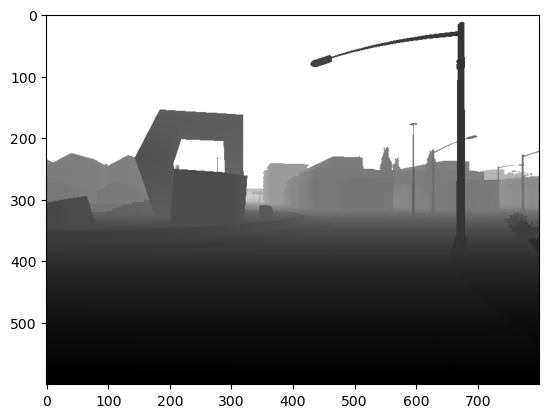

In [5]:
#show an image and its corresponding steering
print(len(list_of_image_data))
print(list_of_image_data[0]["image"].shape)    #size of image: torch.Size([1, 600, 800])
print(list_of_image_data[20]["steer"])
#visualize the image
image = (list_of_image_data[20]["image"].clone()/255 ).view(3, 600, 800)  
image = np.transpose(image,(1,2,0))
print(image.shape)
plt.imshow(image)
plt.show()

In [6]:
"""
PATH_TO_IMAGES = './_out/Dataset001/'
image_paths = os.listdir(PATH_TO_IMAGES)
image_paths.sort()
print(len(image_paths))     #number of images:189

i = 0

for im in image_paths:
    image = torch.from_numpy(np.transpose(cv2.imread(PATH_TO_IMAGES+im)[:,:,:1], (2, 0, 1)))
    imdict = {
        'image': image,
        'steer':steering001[i]
    }
    list_of_image_data.append(imdict)
    i+=1
    
print(list_of_image_data[0]["image"].shape)    #size of image: torch.Size([1, 600, 800])
print(list_of_image_data[0]["steer"])
image = (list_of_image_data[0]["image"].clone() ).view(600, 800)  #visualize the image
plt.imshow(image,cmap='gray')
plt.show()
"""

'\nPATH_TO_IMAGES = \'./_out/Dataset001/\'\nimage_paths = os.listdir(PATH_TO_IMAGES)\nimage_paths.sort()\nprint(len(image_paths))     #number of images:189\n\ni = 0\n\nfor im in image_paths:\n    image = torch.from_numpy(np.transpose(cv2.imread(PATH_TO_IMAGES+im)[:,:,:1], (2, 0, 1)))\n    imdict = {\n        \'image\': image,\n        \'steer\':steering001[i]\n    }\n    list_of_image_data.append(imdict)\n    i+=1\n    \nprint(list_of_image_data[0]["image"].shape)    #size of image: torch.Size([1, 600, 800])\nprint(list_of_image_data[0]["steer"])\nimage = (list_of_image_data[0]["image"].clone() ).view(600, 800)  #visualize the image\nplt.imshow(image,cmap=\'gray\')\nplt.show()\n'

In [7]:
def num_in_range(lst,small,large):
    length = len(lst)
    num = 0
    for i in range(length):
        if (lst[i]['steer']>= small) & (lst[i]['steer']<= large):
            num += 1
    return num

In [8]:
#list_of_image_data.sort(key=lambda k: (k.get('steer', 0))) #sort the list according to 'steer'
print("turning left", num_in_range(list_of_image_data,-100,-4))
print("going straight", num_in_range(list_of_image_data,-4,4))
print("turning right", num_in_range(list_of_image_data,4,100))

turning left 425
going straight 460
turning right 435


In [9]:
random.shuffle(list_of_image_data)
print(list_of_image_data[0]['steer'])
train_dataset = list_of_image_data[:1100]
val_dataset = list_of_image_data[1100:]
print("length of training dataset", len(train_dataset))
print("length of validation dataset", len(val_dataset))
print(train_dataset[0]['steer'])
print(val_dataset[0]['steer'])

-0.8715229999999999
length of training dataset 1100
length of validation dataset 220
-0.8715229999999999
-0.48025362199999994


In [10]:
hparams = {
    "learning_rate": 0.9e-3,
    "batch_size": 50,
}  

In [11]:
#test with one image before training
steer_model = SteerNN(hparams)
#print(list_of_image_data[0]['image'])
steer_model(list_of_image_data[0]['image'])

tensor([[-0.4498]], grad_fn=<AddmmBackward>)

In [12]:
import pytorch_lightning as pl

steer_model = SteerNN(hparams, train_dataset, val_dataset)


trainer = pl.Trainer(
    weights_summary=None,
    max_epochs=25,
    progress_bar_refresh_rate=1, # to prevent notebook crashes in Google Colab environments    
)

trainer.fit(steer_model)

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.
/home/melina/anaconda3/envs/i2dl/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)
/home/melina/anaconda3/envs/i2dl/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


validation loss tensor(114.0325, dtype=torch.float64)
validation loss tensor(197.2120, dtype=torch.float64)
tensor(155.6223, dtype=torch.float64)


/home/melina/anaconda3/envs/i2dl/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


training loss tensor(92.6353, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2768282.9599, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(62582.8616, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(8788.1426, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(13441.8247, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(13257.0844, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(8744.2326, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3410.6845, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(282.2092, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(766.9932, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2984.7277, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3977.9552, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3088.4918, dtype=

validation loss tensor(430.2158, dtype=torch.float64)
validation loss tensor(437.2962, dtype=torch.float64)
validation loss tensor(444.2083, dtype=torch.float64)
validation loss tensor(504.1047, dtype=torch.float64)
validation loss tensor(288.8313, dtype=torch.float64)
tensor(420.9313, dtype=torch.float64)


/home/melina/anaconda3/envs/i2dl/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


training loss tensor(441.1563, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(58.1614, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(189.2446, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(512.8633, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(425.3888, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(278.2944, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(88.6588, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(35.8791, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(33.4942, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(23.5484, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(42.1547, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(55.0662, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(76.3645, dtype=torch.float64, grad_fn=

validation loss tensor(38.0881, dtype=torch.float64)
validation loss tensor(40.3160, dtype=torch.float64)
validation loss tensor(30.6191, dtype=torch.float64)
validation loss tensor(34.1338, dtype=torch.float64)
validation loss tensor(10.9479, dtype=torch.float64)
tensor(30.8210, dtype=torch.float64)
training loss tensor(27.7340, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(28.3007, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(22.5039, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(22.1867, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(12.3363, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(16.3201, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(17.3330, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(14.5650, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(23.6848, dtype=torch.float64, grad_fn=<MseLossBackwar

validation loss tensor(11.5597, dtype=torch.float64)
validation loss tensor(22.6666, dtype=torch.float64)
validation loss tensor(8.5416, dtype=torch.float64)
validation loss tensor(18.0525, dtype=torch.float64)
validation loss tensor(1.5231, dtype=torch.float64)
tensor(12.4687, dtype=torch.float64)
training loss tensor(18.3679, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(10.3241, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(9.7025, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(11.1664, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(9.0939, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(9.0155, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(8.0129, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(7.8421, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(8.3933, dtype=torch.float64, grad_fn=<MseLossBackward>)
trai

validation loss tensor(11.3235, dtype=torch.float64)
validation loss tensor(13.6063, dtype=torch.float64)
validation loss tensor(7.3046, dtype=torch.float64)
validation loss tensor(9.6970, dtype=torch.float64)
validation loss tensor(1.0574, dtype=torch.float64)
tensor(8.5978, dtype=torch.float64)
training loss tensor(3.8812, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(8.4155, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(7.7638, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(7.3973, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(7.4932, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(9.2989, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(5.1590, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.8892, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(5.8848, dtype=torch.float64, grad_fn=<MseLossBackward>)
training 

validation loss tensor(8.8663, dtype=torch.float64)
validation loss tensor(11.7703, dtype=torch.float64)
validation loss tensor(5.4148, dtype=torch.float64)
validation loss tensor(8.2450, dtype=torch.float64)
validation loss tensor(0.7928, dtype=torch.float64)
tensor(7.0178, dtype=torch.float64)
training loss tensor(4.7895, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.9563, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(5.6699, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(5.1392, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(5.1576, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.8867, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(5.1825, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(5.4921, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.0199, dtype=torch.float64, grad_fn=<MseLossBackward>)
training l

validation loss tensor(8.7633, dtype=torch.float64)
validation loss tensor(9.2077, dtype=torch.float64)
validation loss tensor(5.0922, dtype=torch.float64)
validation loss tensor(6.1942, dtype=torch.float64)
validation loss tensor(1.0387, dtype=torch.float64)
tensor(6.0592, dtype=torch.float64)
training loss tensor(4.9401, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(6.7624, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.3118, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.4412, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.4257, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.0507, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.1679, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.2582, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.3193, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(7.8508, dtype=torch.float64)
validation loss tensor(8.5479, dtype=torch.float64)
validation loss tensor(4.1747, dtype=torch.float64)
validation loss tensor(6.0491, dtype=torch.float64)
validation loss tensor(0.6535, dtype=torch.float64)
tensor(5.4552, dtype=torch.float64)
training loss tensor(4.3914, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.3219, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.2253, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.4631, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.7427, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.3364, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.2514, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.4467, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.3403, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(7.7214, dtype=torch.float64)
validation loss tensor(7.1631, dtype=torch.float64)
validation loss tensor(4.2460, dtype=torch.float64)
validation loss tensor(4.7677, dtype=torch.float64)
validation loss tensor(0.7315, dtype=torch.float64)
tensor(4.9259, dtype=torch.float64)
training loss tensor(1.8080, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(5.0573, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.6267, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.5934, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.9098, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.4342, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(4.4100, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.9106, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.3754, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(7.8757, dtype=torch.float64)
validation loss tensor(6.6771, dtype=torch.float64)
validation loss tensor(4.2654, dtype=torch.float64)
validation loss tensor(4.5121, dtype=torch.float64)
validation loss tensor(0.4930, dtype=torch.float64)
tensor(4.7647, dtype=torch.float64)
training loss tensor(2.0085, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.5687, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.6952, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.4482, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.7894, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.8663, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.3223, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.1114, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.7132, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(6.6091, dtype=torch.float64)
validation loss tensor(6.2734, dtype=torch.float64)
validation loss tensor(3.5859, dtype=torch.float64)
validation loss tensor(4.1389, dtype=torch.float64)
validation loss tensor(0.5248, dtype=torch.float64)
tensor(4.2264, dtype=torch.float64)
training loss tensor(3.2344, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.7142, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.9414, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.8479, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.9976, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.8146, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.5806, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.4712, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.5731, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(7.8883, dtype=torch.float64)
validation loss tensor(5.5894, dtype=torch.float64)
validation loss tensor(4.1506, dtype=torch.float64)
validation loss tensor(3.7872, dtype=torch.float64)
validation loss tensor(1.2491, dtype=torch.float64)
tensor(4.5329, dtype=torch.float64)
training loss tensor(2.1387, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.9444, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.5202, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.3496, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.4247, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.0361, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.4521, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.6960, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.7778, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(6.9730, dtype=torch.float64)
validation loss tensor(5.3755, dtype=torch.float64)
validation loss tensor(3.4931, dtype=torch.float64)
validation loss tensor(3.6485, dtype=torch.float64)
validation loss tensor(0.5133, dtype=torch.float64)
tensor(4.0007, dtype=torch.float64)
training loss tensor(1.4290, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.1558, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.3658, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.4293, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.7346, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.7328, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.2692, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.2563, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.1355, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(6.6800, dtype=torch.float64)
validation loss tensor(5.3109, dtype=torch.float64)
validation loss tensor(3.3262, dtype=torch.float64)
validation loss tensor(3.6071, dtype=torch.float64)
validation loss tensor(0.5080, dtype=torch.float64)
tensor(3.8864, dtype=torch.float64)
training loss tensor(0.8822, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.8976, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(3.3175, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(2.0427, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.8561, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.6699, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.7332, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8988, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.4177, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(6.5357, dtype=torch.float64)
validation loss tensor(5.4166, dtype=torch.float64)
validation loss tensor(3.1683, dtype=torch.float64)
validation loss tensor(3.6998, dtype=torch.float64)
validation loss tensor(0.4963, dtype=torch.float64)
tensor(3.8633, dtype=torch.float64)
training loss tensor(1.0782, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.1271, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.7047, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.6985, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.6135, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.7048, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.8465, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.1831, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.8486, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(5.9854, dtype=torch.float64)
validation loss tensor(4.6616, dtype=torch.float64)
validation loss tensor(3.1712, dtype=torch.float64)
validation loss tensor(3.2497, dtype=torch.float64)
validation loss tensor(0.7480, dtype=torch.float64)
tensor(3.5632, dtype=torch.float64)
training loss tensor(1.0301, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.1338, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6265, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.4562, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.3568, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.4407, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.1555, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8019, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.2350, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(6.2362, dtype=torch.float64)
validation loss tensor(4.8302, dtype=torch.float64)
validation loss tensor(2.8945, dtype=torch.float64)
validation loss tensor(3.4797, dtype=torch.float64)
validation loss tensor(0.4915, dtype=torch.float64)
tensor(3.5864, dtype=torch.float64)
training loss tensor(1.6200, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.2717, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.9526, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.2017, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.9972, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5236, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.2152, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.0674, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6241, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(6.0536, dtype=torch.float64)
validation loss tensor(4.9037, dtype=torch.float64)
validation loss tensor(2.9860, dtype=torch.float64)
validation loss tensor(3.3861, dtype=torch.float64)
validation loss tensor(0.6717, dtype=torch.float64)
tensor(3.6002, dtype=torch.float64)
training loss tensor(0.6250, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3990, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.0088, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6506, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.2860, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.9009, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.3422, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.7187, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6657, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(5.9513, dtype=torch.float64)
validation loss tensor(4.8905, dtype=torch.float64)
validation loss tensor(2.9166, dtype=torch.float64)
validation loss tensor(3.4740, dtype=torch.float64)
validation loss tensor(0.2650, dtype=torch.float64)
tensor(3.4995, dtype=torch.float64)
training loss tensor(1.0086, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.2135, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6887, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.1664, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6945, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4872, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5802, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.7792, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8429, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(5.5843, dtype=torch.float64)
validation loss tensor(4.6537, dtype=torch.float64)
validation loss tensor(2.7832, dtype=torch.float64)
validation loss tensor(3.2662, dtype=torch.float64)
validation loss tensor(0.5145, dtype=torch.float64)
tensor(3.3604, dtype=torch.float64)
training loss tensor(0.3337, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.7539, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.7933, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.7368, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6956, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8939, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4654, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.7640, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.1921, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(5.8212, dtype=torch.float64)
validation loss tensor(4.6522, dtype=torch.float64)
validation loss tensor(2.8100, dtype=torch.float64)
validation loss tensor(3.5835, dtype=torch.float64)
validation loss tensor(0.3918, dtype=torch.float64)
tensor(3.4517, dtype=torch.float64)
training loss tensor(0.8441, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6195, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.2720, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5774, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5337, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6939, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.9041, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.7857, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.0504, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(5.6882, dtype=torch.float64)
validation loss tensor(4.5584, dtype=torch.float64)
validation loss tensor(2.7237, dtype=torch.float64)
validation loss tensor(3.1983, dtype=torch.float64)
validation loss tensor(0.4445, dtype=torch.float64)
tensor(3.3226, dtype=torch.float64)
training loss tensor(1.0234, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(1.0346, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.2560, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4100, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4745, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8928, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5107, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5624, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4458, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(5.7216, dtype=torch.float64)
validation loss tensor(4.2548, dtype=torch.float64)
validation loss tensor(2.6586, dtype=torch.float64)
validation loss tensor(2.9703, dtype=torch.float64)
validation loss tensor(0.4864, dtype=torch.float64)
tensor(3.2183, dtype=torch.float64)
training loss tensor(0.3838, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4462, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4192, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3274, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6026, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5244, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6808, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3276, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.2397, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(5.7176, dtype=torch.float64)
validation loss tensor(4.4609, dtype=torch.float64)
validation loss tensor(2.7577, dtype=torch.float64)
validation loss tensor(3.2899, dtype=torch.float64)
validation loss tensor(0.3200, dtype=torch.float64)
tensor(3.3092, dtype=torch.float64)
training loss tensor(0.5901, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.2467, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.7623, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6845, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3180, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.4141, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.8044, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3879, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.2476, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(5.7288, dtype=torch.float64)
validation loss tensor(4.3720, dtype=torch.float64)
validation loss tensor(2.7342, dtype=torch.float64)
validation loss tensor(3.0915, dtype=torch.float64)
validation loss tensor(0.4672, dtype=torch.float64)
tensor(3.2787, dtype=torch.float64)
training loss tensor(0.3427, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6122, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3527, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.2620, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.6174, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3212, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.3518, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.2794, dtype=torch.float64, grad_fn=<MseLossBackward>)
training loss tensor(0.5970, dtype=torch.float64, grad_fn=<MseLossBackward>)
training lo

validation loss tensor(6.0549, dtype=torch.float64)
validation loss tensor(4.3174, dtype=torch.float64)
validation loss tensor(2.7775, dtype=torch.float64)
validation loss tensor(3.2600, dtype=torch.float64)
validation loss tensor(0.4343, dtype=torch.float64)
tensor(3.3688, dtype=torch.float64)



1

In [15]:
#test with one image after training
steer_test = steer_model(list_of_image_data[1000]['image'])/100
steer_test = float(steer_test)
print(steer_test)
print(list_of_image_data[1000]['steer']/100)

0.031213587149977684
0.02858242


In [16]:
PATH = 'models/depth_camera.p'
torch.save(steer_model.state_dict(),PATH)

In [18]:
PATH = 'models/depth_camera.p'
steer_model2 = SteerNN(None)
steer_model2.load_state_dict(torch.load(PATH))
print(steer_model2(list_of_image_data[1000]['image'])/100)
print(list_of_image_data[1000]['steer']/100)

tensor([[0.0312]], grad_fn=<DivBackward0>)
0.02858242
